In [35]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
dataset = datasets.load_boston()

In [5]:
x = dataset.data

In [7]:
target = dataset.target

In [9]:
y = np.reshape(target, (len(target), 1))

In [17]:
x_train, x_verify, y_train, y_verify = train_test_split(x, y, random_state=1)

In [22]:
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
y_pred = lr.predict(x_verify)

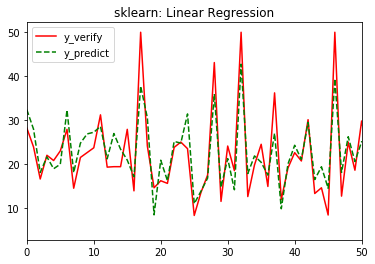

In [24]:
plt.xlim([0, 50])
plt.plot(range(len(y_verify)), y_verify, 'r', label='y_verify')
plt.plot(range(len(y_pred)), y_pred, 'g--', label='y_predict')
plt.title('sklearn: Linear Regression')
plt.legend()
plt.savefig('D:/lmn/lr-13.png')
plt.show()

In [25]:
print(lr.coef_)
print(lr.intercept_)
print("MSE:", metrics.mean_squared_error(y_verify, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_verify, y_pred)))

[[-1.13256952e-01  5.70869807e-02  3.87621062e-02  2.43279795e+00
  -2.12706290e+01  2.86930027e+00  7.02105327e-03 -1.47118312e+00
   3.05187368e-01 -1.06649888e-02 -9.97404179e-01  6.39833822e-03
  -5.58425480e-01]]
[45.23641585]
MSE: 21.889369432475224
RMSE: 4.678607638226914


In [26]:
print(lr.score(x_train, y_train))
print(lr.score(x_verify, y_verify))

0.7167286808673383
0.7790257749137293


In [40]:
MSE_list = []
score_train = []
score_verify = []

for i in range(2, 14):
    x_new = SelectKBest(f_regression, k=i).fit_transform(x, target)
    x_train, x_verify, y_train, y_verify = train_test_split(x_new, y, random_state=1)
    y_train = y_train.reshape(-1)
    train_data = np.insert(x_train, 0, values=y_train, axis=1)
    
    y_t = train_data[:, 0].reshape(-1, 1)
    lr = linear_model.LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_verify)
    
    score_train.append(lr.score(x_train, y_train))
    score_verify.append(lr.score(x_verify, y_verify))
    MSE_list.append(metrics.mean_squared_error(y_verify, y_pred))
    
print('MSE_list:', MSE_list)
print('train_score:', score_train)
print('verify_score:', score_verify)

MSE_list: [30.970145217552165, 27.654129351056007, 27.651260247704574, 27.28301263897529, 28.13859216347985, 28.40750898649361, 26.72723112321327, 26.496212853549714, 26.50275371868627, 25.114149704377105, 22.21691302309827, 21.889369432475224]
train_score: [0.6124282780222445, 0.6552443540161837, 0.6552474484272307, 0.6557456371776518, 0.6585732416001857, 0.6615319824645668, 0.6718270844511676, 0.6770802993594054, 0.6773070852831651, 0.6815995719367322, 0.7115296233293787, 0.7167286808673383]
verify_score: [0.6873549116447072, 0.7208302494671684, 0.7208592132019043, 0.7245766903192716, 0.7159395743433961, 0.7132248462302158, 0.7301873311438802, 0.7325194715592153, 0.7324534412146956, 0.7464714647562242, 0.7757192067942967, 0.7790257749137293]


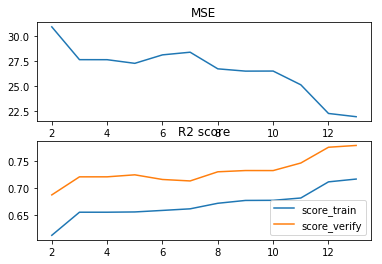

In [43]:
plt.subplot(2, 1, 1)
plt.plot(range(2, 14), MSE_list)
plt.title('MSE')
plt.subplot(2, 1, 2)
plt.plot(range(2, 14), score_train, label='score_train')
plt.plot(range(2, 14), score_verify, label='score_verify')
plt.legend()
plt.title('R2 score')
plt.savefig('D:/lmn/feature_selection.png')
plt.show()